In [50]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [ ]:
# I     PRZYGOTOWYWANIE DANYCH

In [25]:
data= pd.read_csv('bank.csv',sep=';')

In [26]:
#Replace unknown to NA
data.poutcome.replace(('unknown'), (np.NaN), inplace=True)
data.marital.replace(('other'), (np.NaN), inplace=True)
data.poutcome.replace(('other'), (np.NaN), inplace=True)
data.job.replace(('other'), (np.NaN), inplace=True)


In [27]:
#Replace yes , no to 0 and 1 values 

data.default.replace(('yes', 'no'), (1, 0), inplace=True)
data.housing.replace(('yes', 'no'), (1, 0), inplace=True)
data.loan.replace(('yes', 'no'), (1, 0), inplace=True)
data.poutcome.replace(('success', 'failure'), (1, 0), inplace=True)

In [28]:
#Drop Nan
data = data.dropna(axis=0)

In [29]:
#Take all of the independent variables 
X = data.iloc[:,:-1].values


In [30]:
Y = data.iloc[:,16].values

In [32]:
#Change labels 
labelEncoder_X = LabelEncoder() 
X[:,3]= labelEncoder_X.fit_transform(X[:,3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()


ValueError: could not convert string to float: 'apr'

In [33]:
labelEncoder_X = LabelEncoder() 
X[:,4]= labelEncoder_X.fit_transform(X[:,4])

In [34]:
#Change labels 
labelEncoder_Y = LabelEncoder() 
Y = labelEncoder_Y.fit_transform(Y)

In [35]:
print('Null values: ', data.isnull().values.any())
print('There are no null values')

Null values:  False
There are no null values


In [36]:
#   II     Spliting dataset into test set and training set 
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.3 , random_state = 0)


In [37]:
# III SCALING NUMERICAL VARIABLES 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

ValueError: could not convert string to float: 'jul'

In [21]:
#    IV   DISCRIPTIVE STATISTICS
print('Data shape: ',data.shape, '\nColumn types:\n',
data.dtypes)

Data shape:  (619, 17) 
Column types:
 age            int64
job           object
marital       object
education     object
default        int64
balance        int64
housing        int64
loan           int64
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome     float64
y             object
dtype: object


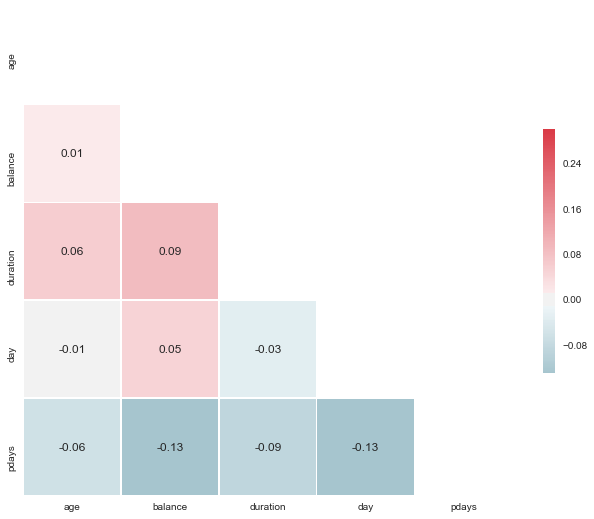

In [46]:
# Coorelation 

numCols = ["age", "balance", "duration", "day",
                      "pdays" ]



sns.set(style="white")

corr = data[numCols].corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot = corr.round(2), linewidths=.5, cbar_kws={"shrink": .5})

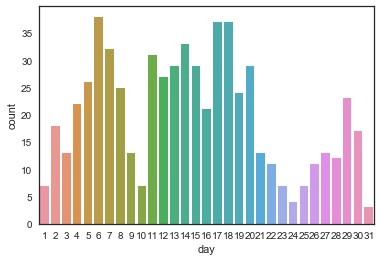

In [48]:
sns.countplot(x='day', data=data)

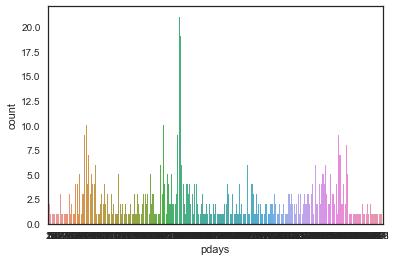

In [49]:
sns.countplot(x='pdays', data=data)

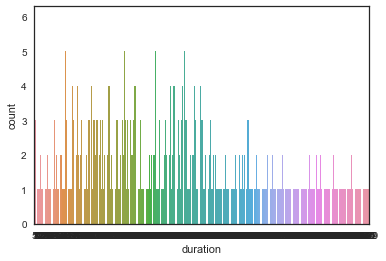

In [47]:
sns.countplot(x='duration', data=data)

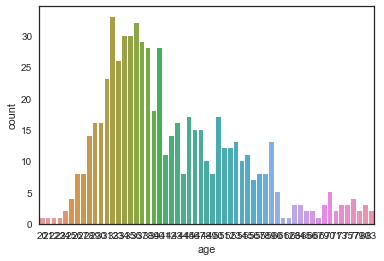

In [41]:
sns.countplot(x='age', data=data)

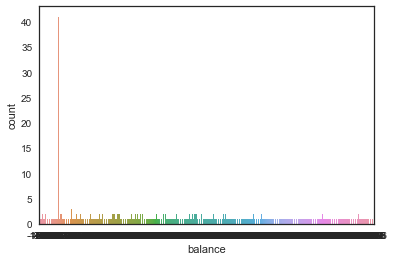

In [43]:
sns.countplot(x='balance', data=data)

In [52]:
#check if there is a normal distribution
stats.jarque_bera(data)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [53]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,0.0,no
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,0.0,no
5,35,management,single,tertiary,0,747,0,0,cellular,23,feb,141,2,176,3,0.0,no
9,43,services,married,primary,0,-88,1,1,cellular,17,apr,313,1,147,2,0.0,no
14,31,blue-collar,married,secondary,0,360,1,1,cellular,29,jan,89,1,241,1,0.0,no
17,37,admin.,single,tertiary,0,2317,1,0,cellular,20,apr,114,1,152,2,0.0,no
27,67,retired,married,unknown,0,696,0,0,telephone,17,aug,119,1,105,2,0.0,no
38,33,management,married,secondary,0,3935,1,0,cellular,6,may,765,1,342,2,0.0,yes
40,38,management,single,tertiary,0,11971,1,0,unknown,17,nov,609,2,101,3,0.0,no
49,61,admin.,married,unknown,0,4629,1,0,cellular,27,jan,181,1,92,1,1.0,yes


In [ ]:
sns.countplot(x='sex', data=data)